# This project focuses on predicting customer churn for Orange Telecom using historical customer data. The main objective is to analyze behavior patterns of users who are likely to leave the service and develop a machine learning model to help reduce churn. The dataset includes features like account length, call usage across different time zones (day, evening, night, international), service plans (voice mail and international), and customer service call frequency, with the target variable being whether a customer churned or not. Using the PACE model framework, we first identified the business Problem (high churn rate affecting revenue), then took Action by performing exploratory data analysis (EDA), feature engineering, and training models like Logistic Regression and Random Forest. The results were Communicated through visualizations (churn distribution, feature importance, customer behavior) and we proposed actionable recommendations based on key churn indicators. Finally, the solution is ready for Execution, allowing Orange Telecom to focus retention efforts on high-risk customers, improving profitability and customer satisfaction.



# Importing Required Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Plan Phase

In [2]:
data = pd.read_csv(r"C:\Users\ligio\Downloads\churn-bigml-80.csv")
df = pd.DataFrame(data)
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False


In [3]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [5]:
df.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,2666,2666.000000,2666.000000,2666,2666,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,88,NaN,NaN,2396,1933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2278
mean,NaN,100.620405,437.438860,NaN,NaN,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641,NaN
std,NaN,39.563974,42.521018,NaN,NaN,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,73.000000,408.000000,NaN,NaN,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,100.000000,415.000000,NaN,NaN,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000,NaN


Key Statistics & Observations:

Account length: Ranges from 1 to 243 days, with a mean around 100 days, suggesting varying customer tenures.

Number vmail messages: Most customers have 0 voicemail messages (25th and 50th percentile), but some go up to 50, indicating voicemail is underutilized.

Total day/eve/night/int’l minutes and their corresponding charges show standard telco billing patterns (charges increase with time usage).

Customer service calls: Most customers make 1 or 2 calls, but some go up to 9, which may be linked to dissatisfaction or issues.

International plan: Only 270 customers (out of 2666) have an international plan (based on count of "No" = 2396).

Churn: 2278 customers did not churn, while 388 did, indicating class imbalance (~15% churn).

# Analyze Phase

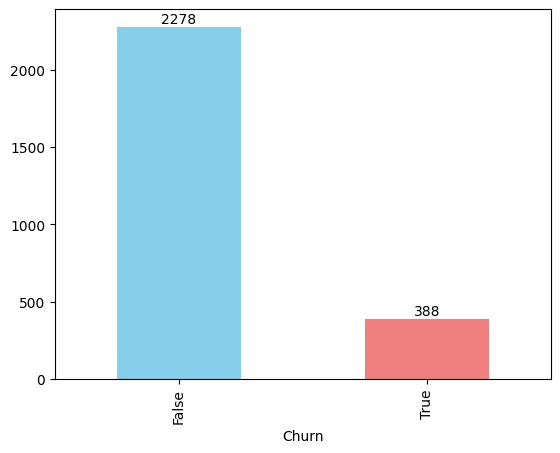

In [6]:
a = df['Churn'].value_counts()
ax = a.plot(kind='bar',color=['skyblue', 'lightcoral'])
for i,count in enumerate(a):
    ax.text(i,count+2,str(count),ha='center',va='bottom')

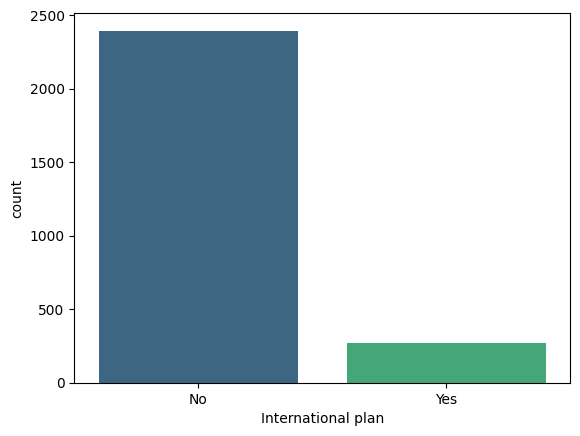

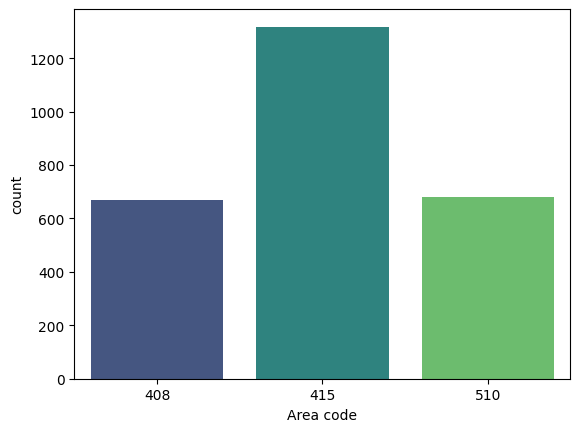

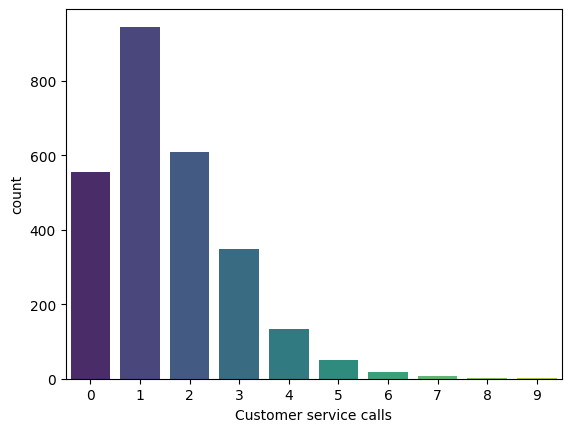

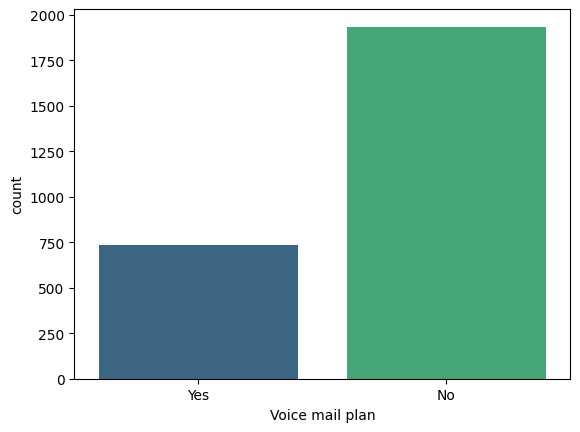

In [7]:
col = ['International plan','Area code','Customer service calls','Voice mail plan']

for i in col:
    sns.countplot(data=df,x=i,palette='viridis')
    plt.show()

In [8]:
df['Total minutes'] = df['Total day minutes'] + df['Total eve minutes'] + df['Total night minutes'] + df['Total intl minutes']
df['Total charges'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge'] + df['Total intl charge']
df['Total calls'] = df['Total day calls'] + df['Total eve calls'] + df['Total night calls'] + df['Total intl calls']


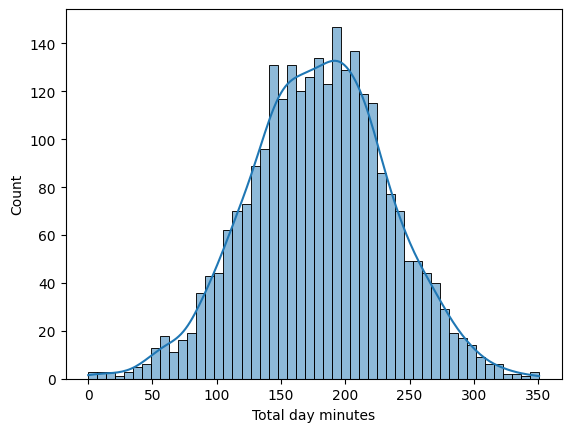

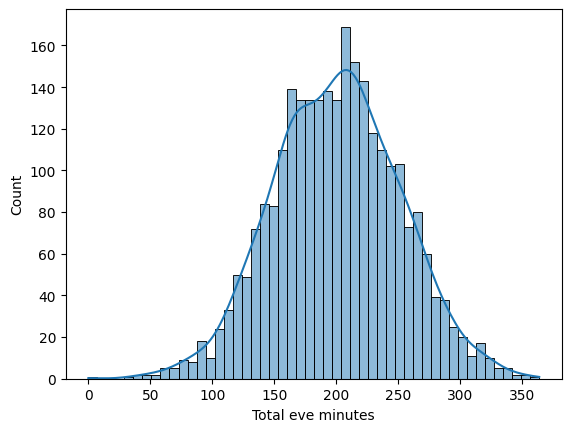

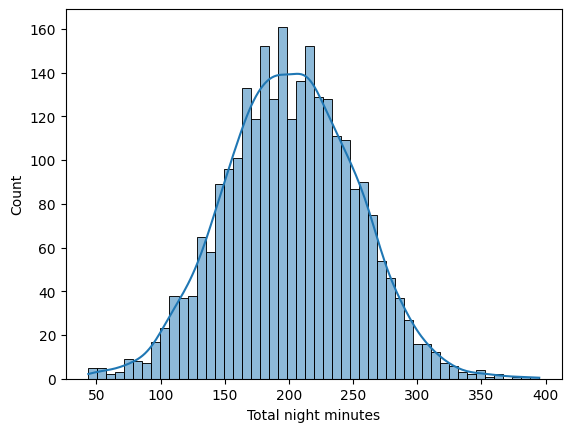

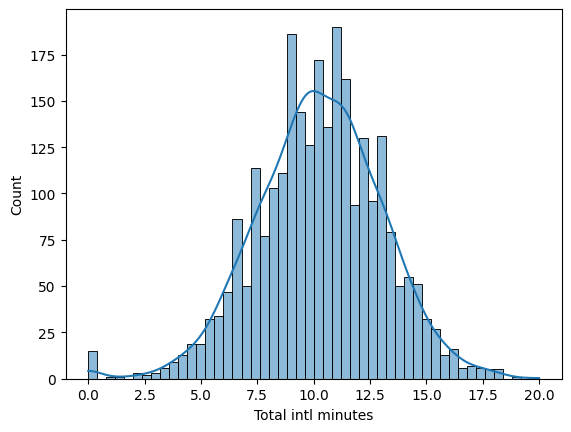

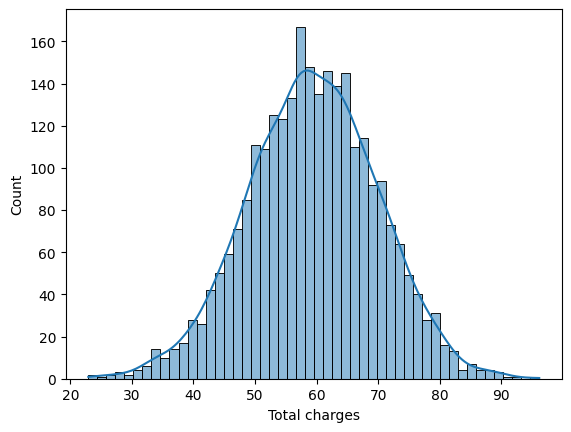

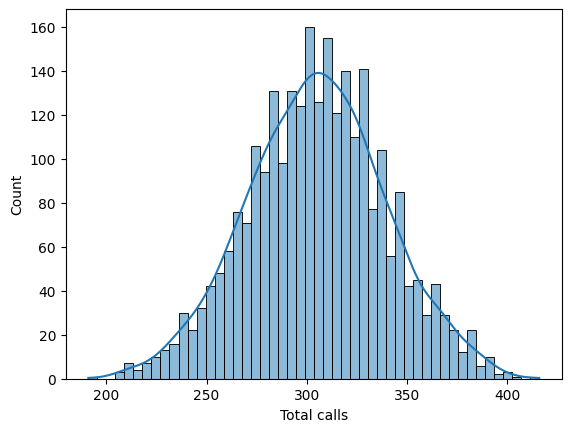

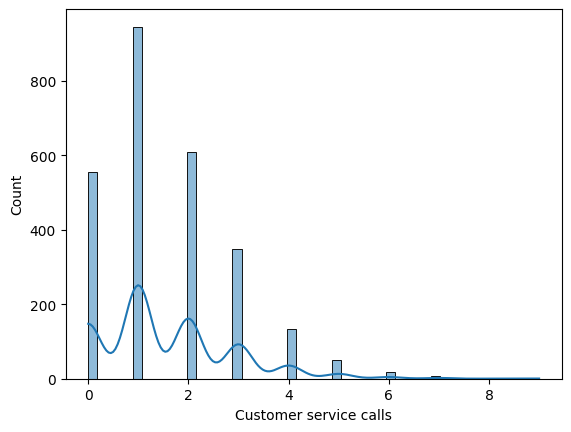

In [9]:
col = ['Total day minutes','Total eve minutes','Total night minutes','Total intl minutes','Total charges','Total calls','Customer service calls']

for i in col:
    sns.histplot(data=df,x=i,bins=50,kde=True,palette='viridis')
    plt.show()

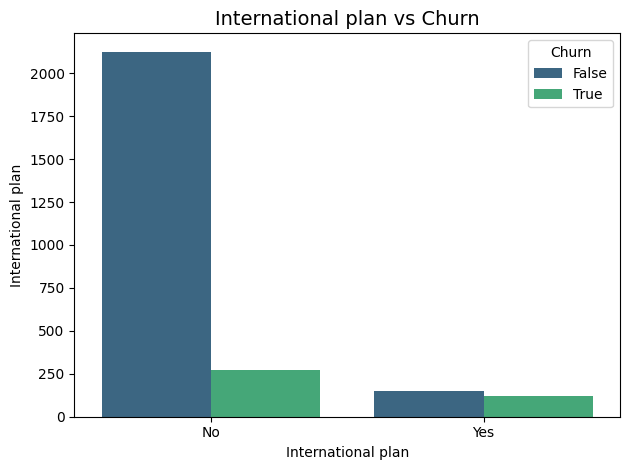

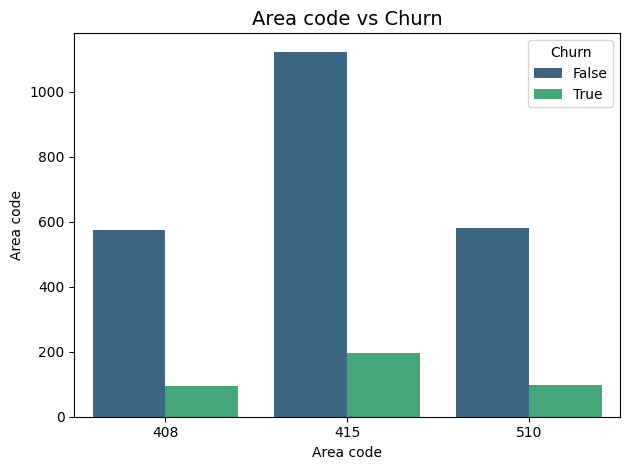

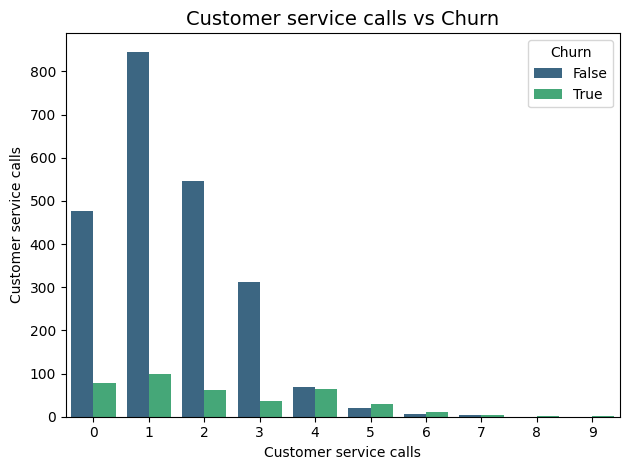

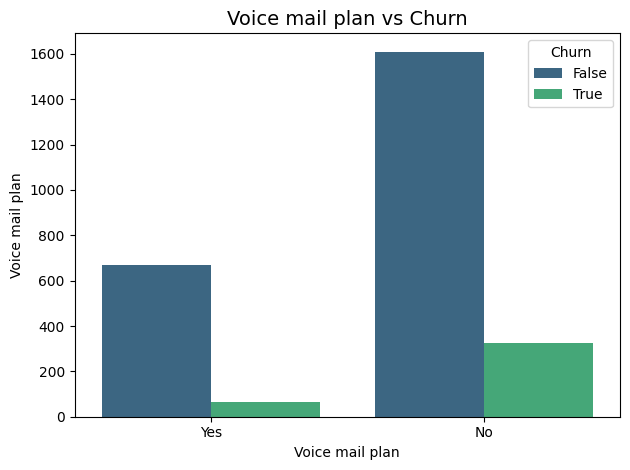

In [10]:
col = ['International plan','Area code','Customer service calls','Voice mail plan']

for i in col:
    sns.countplot(data=df,x=i,palette='viridis',hue='Churn')
    plt.title(f"{i} vs Churn", fontsize=14)
    plt.tight_layout()
    plt.ylabel(i)
    plt.show()

# Interpretation:
1. Customer who have international plan are more likely to Churn Due to HIgh Service Charge
2. Customer who have Area Code 415 are more likely to Churn Due to Service Issue
3. The More Customer Service Calls the more Customer is likely to Churn
4. Customer who don't have Voice mail plan are more likely to churn so if we reduce Voice mail plain price we can retain Customer

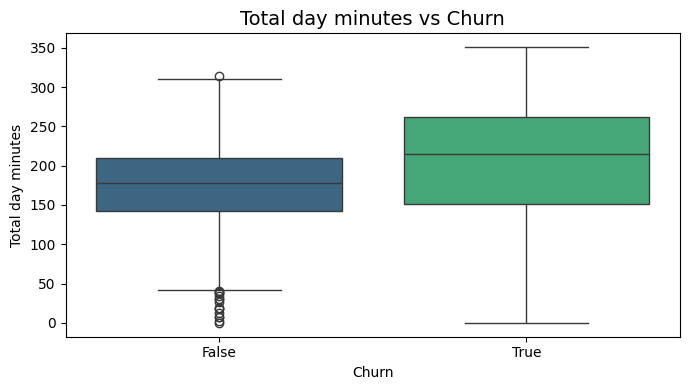

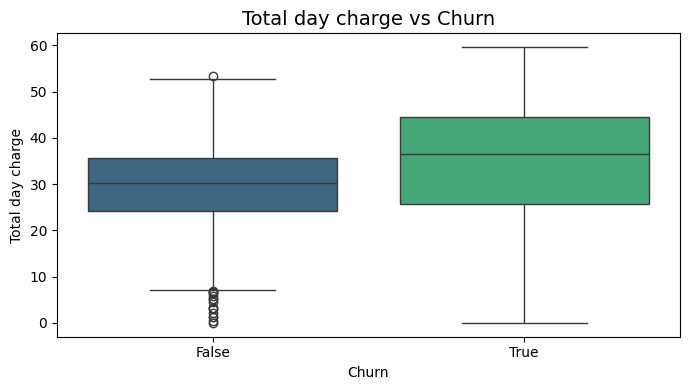

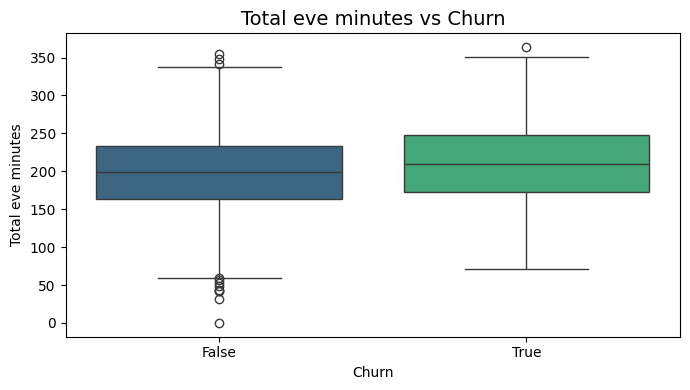

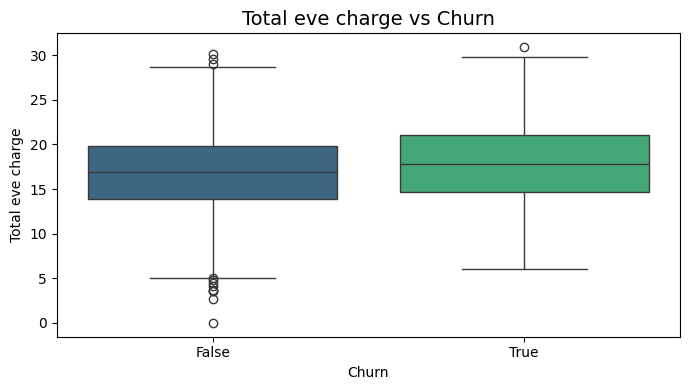

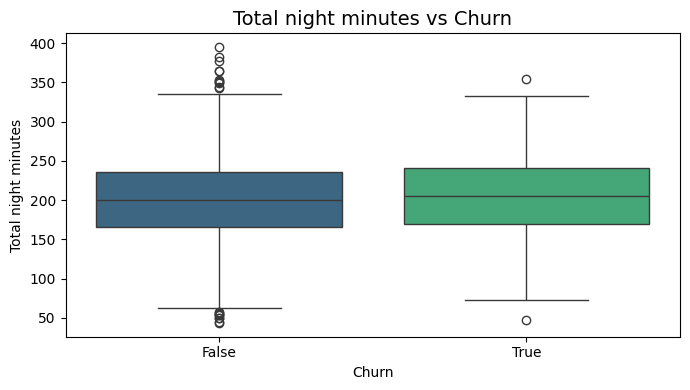

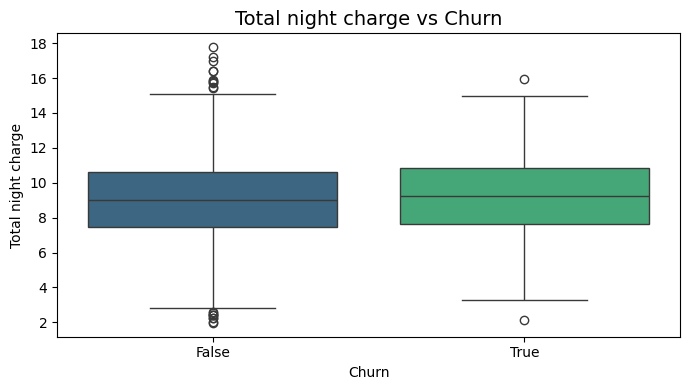

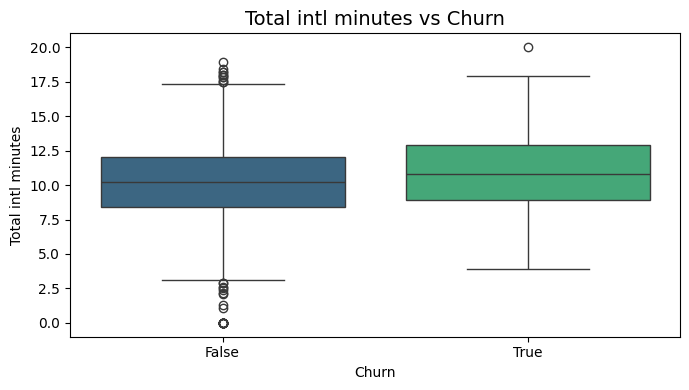

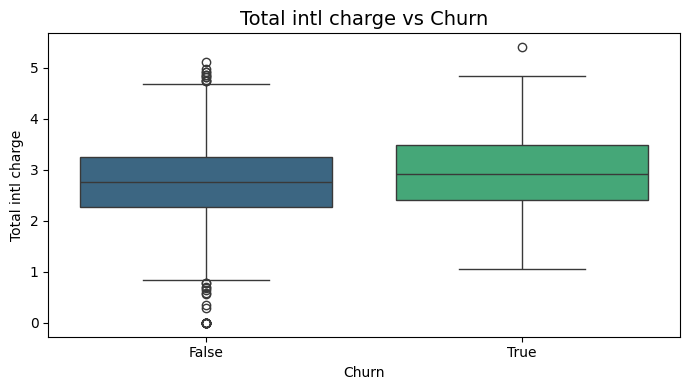

In [11]:
cols = ['Total day minutes', 'Total day charge',
        'Total eve minutes', 'Total eve charge',
        'Total night minutes', 'Total night charge',
        'Total intl minutes', 'Total intl charge']

for col in cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x='Churn', y=col, palette='viridis')
    plt.title(f'{col} vs Churn', fontsize=14)
    plt.ylabel(col)
    plt.xlabel('Churn')
    plt.tight_layout()
    plt.show()

# Interpretation:
"False" (Non-Churned Customers) show outliers in nearly every boxplot, while
"True" (Churned Customers) do not. This suggests:

1. High-Usage Outliers Are Staying
   Non-churners include a few heavy users (high day/eve/night minutes/charges).
   These users are not churning—possibly due to:
   Satisfaction with service
   Customized plans or loyalty programs

2. Churned Users Have More Consistent, Moderate Usage
   The distribution of churners is tighter and lower, without extreme values.
   Suggests moderate users are more likely to churn — maybe they:
   Don’t see value for money
   Are price-sensitive or have no loyalty

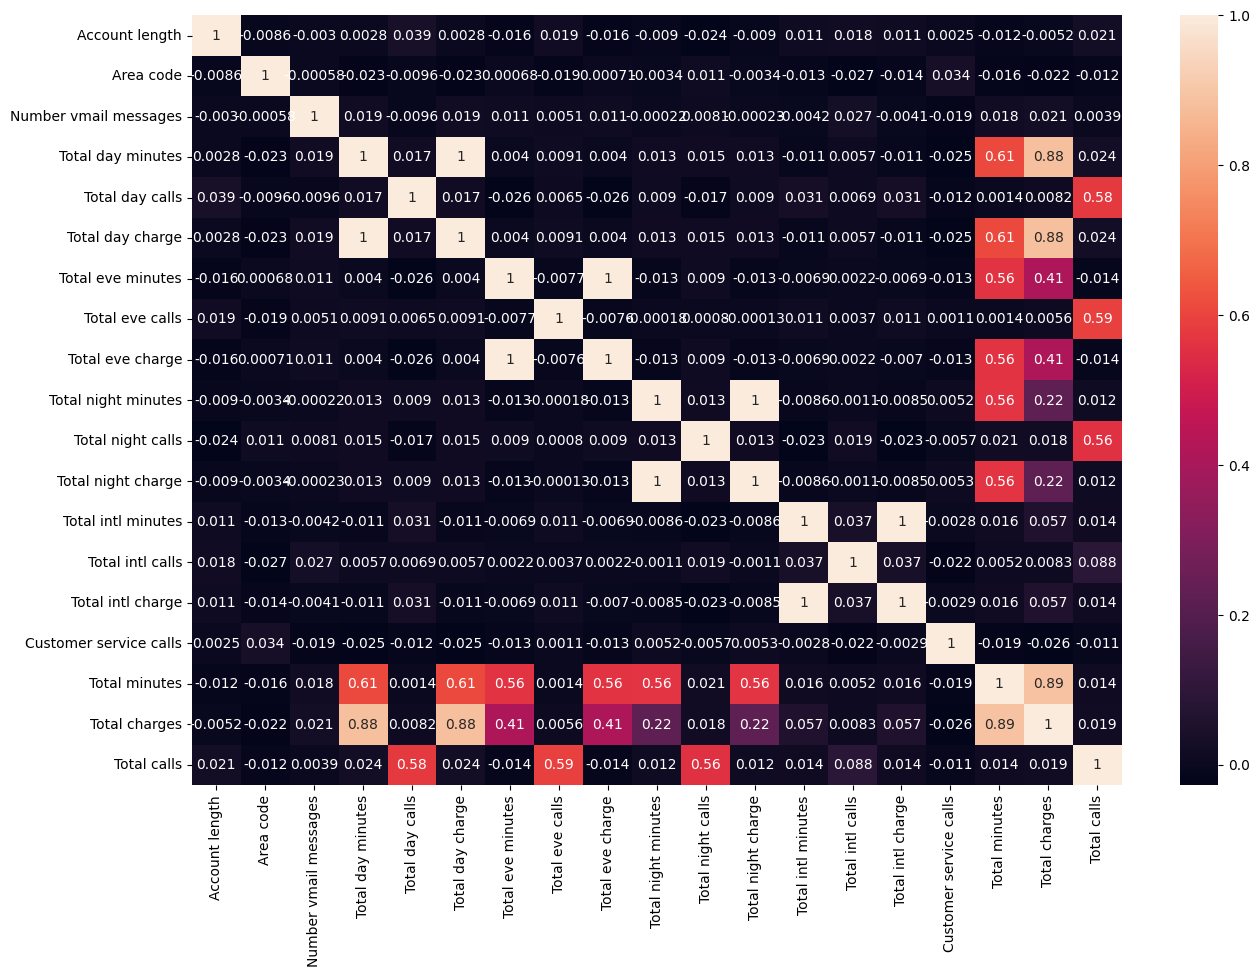

In [12]:
plt.figure(figsize=(15,10))
co = df.select_dtypes(include=['int','float'])
sns.heatmap(co.corr(),annot=True)
plt.show()

# Use correlation insights to avoid redundant features in linear models like Logistic Regression, but you can keep all features for tree-based models like Random Forest or XGBoost.

# Construct Phase

In [13]:
# Drop redundant charge , states columns since minutes are more interpretable
df_reduced = df.drop(columns=[
    'Total day charge', 
    'Total eve charge', 
    'Total night charge', 
    'Total intl charge', 
    'Total charges',
    'State'
])


In [14]:
df_reduced

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn,Total minutes,Total calls
0,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False,717.2,303
1,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False,625.2,332
2,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False,539.4,333
3,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False,564.8,255
4,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False,512.0,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,No,No,0,134.7,98,189.7,68,221.4,128,11.8,5,2,False,557.6,299
2662,192,415,No,Yes,36,156.2,77,215.5,126,279.1,83,9.9,6,2,False,660.7,292
2663,68,415,No,No,0,231.1,57,153.4,55,191.3,123,9.6,4,3,False,585.4,239
2664,28,510,No,No,0,180.8,109,288.8,58,191.9,91,14.1,6,2,False,675.6,264


In [15]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [16]:
# Checking for Class Imbalance in Churn
df_reduced['Churn'].value_counts(normalize=True)*100


Churn
False    85.446362
True     14.553638
Name: proportion, dtype: float64

In [17]:
# There is class Imbalance so we need to fix it before building model

In [18]:
# Performing Encoding
l = ['International plan','Voice mail plan','Churn']
la = LabelEncoder()
for col in l:
    df_reduced[col] = la.fit_transform(df_reduced[col])

    

In [76]:
# We Do Feature Engineering to reduce bias
# Doing This Step Because After Execution Phase I Have Notice My model Became Bias On International Plan 

df_reduced['intl_plan_day_minutes'] = df_reduced['International plan'] * df_reduced['Total day minutes']
df_reduced['cust_serv_intl'] = df_reduced['Customer service calls'] * df_reduced['International plan']
df_reduced['total_calls_ratio'] = df_reduced['Total calls'] / (df_reduced['Account length'] + 1)


In [77]:
x = df_reduced.drop('Churn', axis=1)
y = df_reduced['Churn']


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=45
)


In [78]:
from sklearn.model_selection import GridSearchCV
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
log_reg_cv = GridSearchCV(log_reg, log_reg_params, scoring=scoring, cv=5, refit='f1', n_jobs=-1, verbose=1)

In [79]:
log_reg_cv.fit(x_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1_macro',
                      'precision': 'precision_macro',
                      'recall': 'recall_macro'},
             verbose=1)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

best_model = log_reg_cv.best_estimator_
y_pred = best_model.predict(x_test)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[345 111]
 [ 15  63]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       456
           1       0.36      0.81      0.50        78

    accuracy                           0.76       534
   macro avg       0.66      0.78      0.67       534
weighted avg       0.87      0.76      0.80       534

Accuracy Score: 0.7640449438202247


In [81]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_params = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6]
}
dt_cv = GridSearchCV(dt, dt_params, scoring=scoring, cv=5, refit='f1', n_jobs=-1, verbose=1)

In [82]:
dt_cv.fit(x_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [5, 10, 15]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1_macro',
                      'precision': 'precision_macro',
                      'recall': 'recall_macro'},
             verbose=1)

In [83]:
best_model1 = dt_cv.best_estimator_
y_pred = best_model1.predict(x_test)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[433  23]
 [ 11  67]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       456
           1       0.74      0.86      0.80        78

    accuracy                           0.94       534
   macro avg       0.86      0.90      0.88       534
weighted avg       0.94      0.94      0.94       534

Accuracy Score: 0.9363295880149812


In [84]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_params = {
    'n_estimators': [100, 150],
    'max_depth': [5, 7, 9],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}
rf_cv = GridSearchCV(rf, rf_params, scoring=scoring, cv=5, refit='f1', n_jobs=-1, verbose=1)

In [85]:
rf_cv.fit(x_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 150]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1_macro',
                      'precision': 'precision_macro',
                      'recall': 'recall_macro'},
             verbose=1)

In [86]:
best_model2 = rf_cv.best_estimator_
y_pred = best_model2.predict(x_test)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[444  12]
 [ 11  67]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       456
           1       0.85      0.86      0.85        78

    accuracy                           0.96       534
   macro avg       0.91      0.92      0.91       534
weighted avg       0.96      0.96      0.96       534

Accuracy Score: 0.9569288389513109


In [87]:
xgb = XGBClassifier(eval_metric='logloss', scale_pos_weight=1, random_state=42)
xgb_params = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}
xgb_cv = GridSearchCV(xgb, xgb_params, scoring=scoring, cv=5, refit='f1', n_jobs=-1, verbose=1)

In [88]:
xgb_cv.fit(x_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 150], 'subsample': [0.8, 1]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1_macro',
                      'precision': 'precision_macro',
                      'recall': 'recall_macro'},
             verbose=1)

In [89]:
best_model3 = xgb_cv.best_estimator_
y_pred = best_model3.predict(x_test)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[451   5]
 [ 16  62]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       456
           1       0.93      0.79      0.86        78

    accuracy                           0.96       534
   macro avg       0.95      0.89      0.92       534
weighted avg       0.96      0.96      0.96       534

Accuracy Score: 0.9606741573033708


In [90]:
print(log_reg_cv.score(x_train,y_train)*100,log_reg_cv.score(x_test,y_test)*100)
print(dt_cv.score(x_train,y_train)*100,dt_cv.score(x_test,y_test)*100)
print(rf_cv.score(x_train,y_train)*100,rf_cv.score(x_test,y_test)*100)
print(xgb_cv.score(x_train,y_train)*100,xgb_cv.score(x_test,y_test)*100)

66.36429734715458 67.27941176470588
88.2728420550533 87.9920634920635
94.23798301004784 91.41281016870941
99.04349152511956 91.62102589008853


In [91]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('dt', dt_cv.best_estimator_),
        ('rf', rf_cv.best_estimator_),
        ('xgb', xgb_cv.best_estimator_)
    ],
    voting='soft'
)

voting_clf.fit(x_train, y_train)



VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=5,
                                                     min_samples_leaf=2,
                                                     min_samples_split=10,
                                                     random_state=42)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=9,
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     n_estimators=150,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callback...
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=150, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [92]:
y_pred = voting_clf.predict(x_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[448   8]
 [ 12  66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       456
           1       0.89      0.85      0.87        78

    accuracy                           0.96       534
   macro avg       0.93      0.91      0.92       534
weighted avg       0.96      0.96      0.96       534

Accuracy Score: 0.9625468164794008


In [93]:
print(voting_clf.score(x_train,y_train)*100,voting_clf.score(x_test,y_test)*100)

97.37335834896811 96.25468164794007


In [94]:
dfnew = {'lr':log_reg_cv.predict(x_test),'dt':dt_cv.predict(x_test),'rf':rf_cv.predict(x_test),'xgb':xgb_cv.predict(x_test),'vc':voting_clf.predict(x_test)}

In [95]:
pd.DataFrame(dfnew).head(10)

,lr,dt,rf,xgb,vc
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,1,1,1,1
5,1,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,1,0,0,0,0
9,1,0,0,0,0


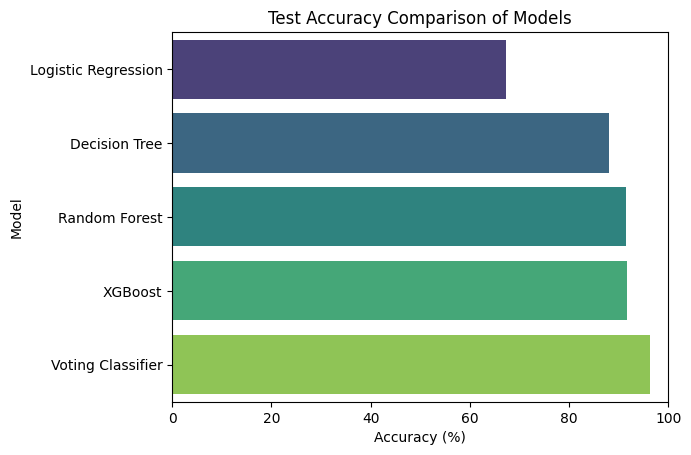

In [96]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Voting Classifier']
accuracies = [
    log_reg_cv.score(x_test, y_test) * 100,
    dt_cv.score(x_test, y_test) * 100,
    rf_cv.score(x_test, y_test) * 100,
    xgb_cv.score(x_test, y_test) * 100,
    voting_clf.score(x_test, y_test) * 100
]

sns.barplot(x=accuracies, y=models, palette='viridis')
plt.title("Test Accuracy Comparison of Models")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.xlim(0, 100)
plt.show()


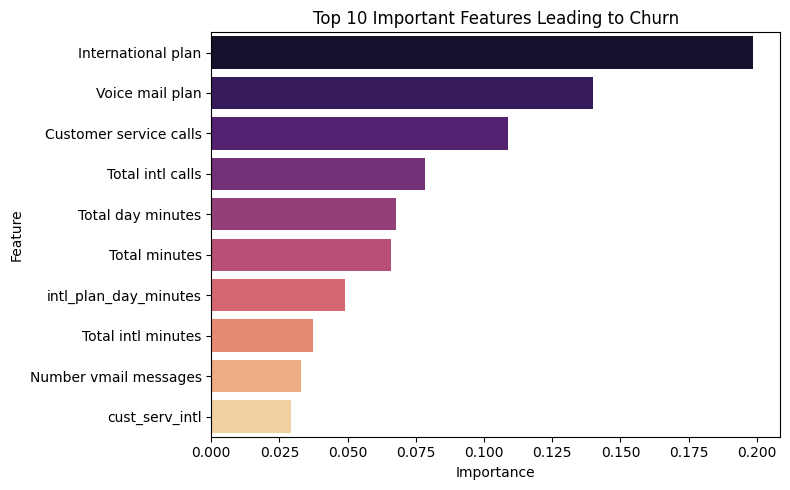

In [97]:
# Feature importances from XGBoost
importances = xgb_cv.best_estimator_.feature_importances_
features = x_train.columns

imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=imp_df, palette='magma')
plt.title("Top 10 Important Features Leading to Churn")
plt.tight_layout()
plt.show()


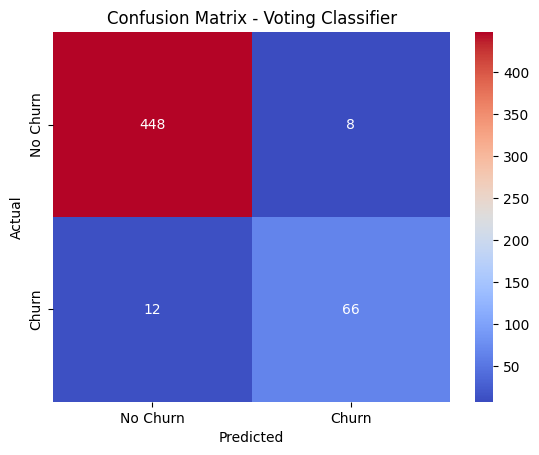

In [98]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, voting_clf.predict(x_test))

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


True Negatives (No Churn correctly predicted): 448

False Positives (No Churn predicted as Churn): 8

False Negatives (Churn predicted as No Churn): 12

True Positives (Churn correctly predicted): 66

# Execution Phase

In [53]:
# save_model.py
import pickle

with open('churn_model.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)
